In [2]:
import json
import re
import string
import unidecode

import numpy as np
import random
import theano
import theano.tensor as T
import io

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pickle
with open('ptwiki-20170801-win-doc1kk-vocab30k-embedding300.pickle', 'rb') as handle:
    W_in_values = pickle.load(handle)
    
with open('ptwiki-20170801-wout-doc1kk-vocab30k-embedding300.pickle', 'rb') as handle:
    W_out_values = pickle.load(handle)
    
with open('ptwiki-20170801-tokens-doc1kk-vocab30k.pickle', 'rb') as handle:
    tokens = pickle.load(handle)


In [4]:
tokens

{'adoptar': 7908,
 'quilos': 17262,
 'da_Liberdade': 11318,
 'organização': 12745,
 'criou': 7212,
 'vias': 12082,
 'Notre_Dame': 8566,
 'recém_formado': 3351,
 'parada_cardíaca': 10903,
 'previstos': 12590,
 'Pepe': 23674,
 'destaques': 10766,
 'Fuzileiros_Navais': 22832,
 'entidades': 8121,
 'designação_provisória': 8369,
 'série_televisiva': 4234,
 'teoremas': 29289,
 'coincidência': 24125,
 'pronunciar': 9847,
 'Chad': 29614,
 'dum': 17887,
 'chamas': 11060,
 'estudados': 24343,
 'homer': 21631,
 'aconselhamento': 24841,
 'chamá': 16389,
 'belezas_naturais': 2830,
 'artificialmente': 8362,
 'concluindo': 28695,
 'Paige': 27549,
 'actualmente': 3180,
 'repúdio': 16244,
 'Desportiva': 25316,
 'dimensão': 9138,
 'perdas': 9478,
 'temporada': 29022,
 'marta': 16306,
 'Springs': 167,
 'kg_masculino': 20467,
 'espécie_vegetal': 691,
 'alocação': 16889,
 'Lotus': 21545,
 'convidadas': 6913,
 'robin': 16932,
 'trigésima': 15315,
 'moça': 4938,
 'governo_soviético': 12328,
 'Rui_Barbosa': 1

In [5]:
tokens_by_id = {idx:word for (word,idx) in tokens.items()}

In [6]:
word_vectors = W_in_values + W_out_values

# Viz w/ PCA

In [7]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_coord = pca.fit_transform(word_vectors)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[ 0.06028554  0.04687819]
[ 256.10366821  225.83676147]


In [8]:
tokens

{'adoptar': 7908,
 'quilos': 17262,
 'da_Liberdade': 11318,
 'organização': 12745,
 'criou': 7212,
 'vias': 12082,
 'Notre_Dame': 8566,
 'recém_formado': 3351,
 'parada_cardíaca': 10903,
 'previstos': 12590,
 'Pepe': 23674,
 'destaques': 10766,
 'Fuzileiros_Navais': 22832,
 'entidades': 8121,
 'designação_provisória': 8369,
 'série_televisiva': 4234,
 'teoremas': 29289,
 'coincidência': 24125,
 'pronunciar': 9847,
 'Chad': 29614,
 'dum': 17887,
 'chamas': 11060,
 'estudados': 24343,
 'homer': 21631,
 'aconselhamento': 24841,
 'chamá': 16389,
 'belezas_naturais': 2830,
 'artificialmente': 8362,
 'concluindo': 28695,
 'Paige': 27549,
 'actualmente': 3180,
 'repúdio': 16244,
 'Desportiva': 25316,
 'dimensão': 9138,
 'perdas': 9478,
 'temporada': 29022,
 'marta': 16306,
 'Springs': 167,
 'kg_masculino': 20467,
 'espécie_vegetal': 691,
 'alocação': 16889,
 'Lotus': 21545,
 'convidadas': 6913,
 'robin': 16932,
 'trigésima': 15315,
 'moça': 4938,
 'governo_soviético': 12328,
 'Rui_Barbosa': 1

In [9]:
#PALAVRAS SELECIONADAS PARA PLOTAR
#visualize_words = ["homem", "mulher", "criança", "ônibus", "carro", "bicicleta", "água",
#                  "rio", "mar", "refrigerante", "soda", "suco", "batata","feijão", "arroz",
#                 "sujo", "limpo", "velho", "novo", "caro", "barato", "alto", "baixo",
#                  "muito", "pouco", "ontem", "hoje", "amanhã"]
visualize_words = ["Lula", "Dilma_Rousseff","Dilma", "presidente", "golpe", "Michel_Temer", "Temer", "Aécio",
                   "Aécio_Neves", "FHC", "Fernando_Henrique_Cardoso", "República_Federativa_do_Brasil", "Brasil",
                  "Argentina", "China", "Índia", "Estados_Unidos", "Estados_Unidos_da_Américas"]
filter_viz_words = list(set(visualize_words) & set(tokens.keys()))
filter_viz_words

['golpe',
 'Dilma_Rousseff',
 'presidente',
 'Estados_Unidos',
 'Argentina',
 'Fernando_Henrique_Cardoso',
 'Índia',
 'Brasil',
 'Dilma',
 'China',
 'Lula',
 'Temer']

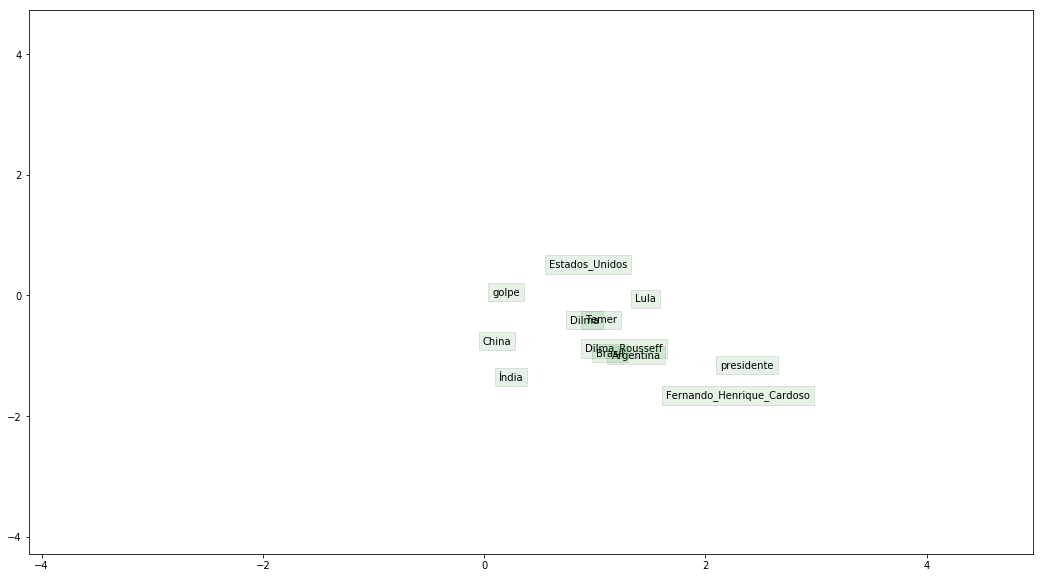

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
#PLOTAR PALAVRAS ESCOLHIDAS


for i in range(len(filter_viz_words)):
    idx = tokens[filter_viz_words[i]]
    plt.text(word_coord[idx][0], word_coord[idx][1], filter_viz_words[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(word_coord[:,0]), np.max(word_coord[:,0])))
plt.ylim((np.min(word_coord[:,1]), np.max(word_coord[:,1])))

fig = plt.gcf()
fig.set_size_inches(18, 10)


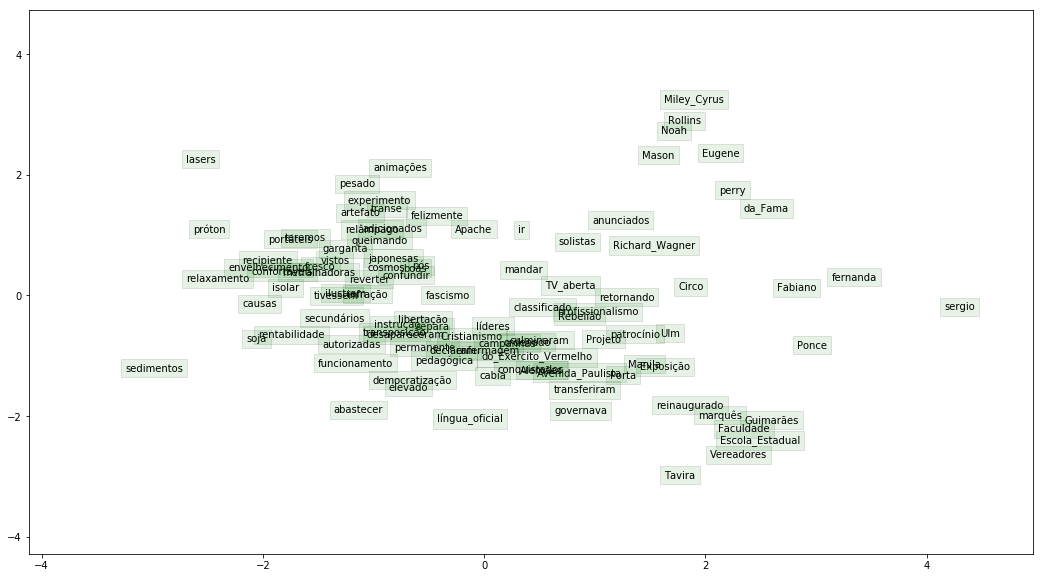

In [11]:
#PLOTAR PALAVRAS ALEATÓRIAS
import random

sample_words = random.sample(range(len(list(tokens.keys()))), 100)

sample_words[0]

for i in sample_words:
    plt.text(word_coord[i][0], word_coord[i][1], tokens_by_id[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(word_coord[:,0]), np.max(word_coord[:,0])))
plt.ylim((np.min(word_coord[:,1]), np.max(word_coord[:,1])))

fig = plt.gcf()
fig.set_size_inches(18, 10)

# Viz w/ TSNE

In [31]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(word_vectors)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 30000 samples in 1.559s...
[t-SNE] Computed neighbors for 30000 samples in 659.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for 

In [32]:
import pickle

with open('TSNE_result.pickle', 'wb') as handle:
    pickle.dump(tsne_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('TSNE_object.pickle', 'wb') as handle:
    pickle.dump(tsne, handle, protocol=pickle.HIGHEST_PROTOCOL)

(-5.8836479, 6.0905609)

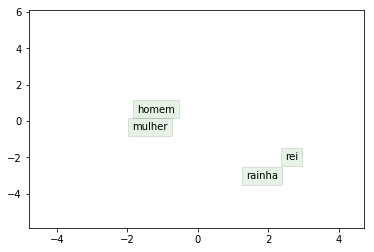

In [34]:
for i in range(len(filter_viz_words)):
    idx = tokens[filter_viz_words[i]]
    plt.text(tsne_results[idx][0], tsne_results[idx][1], filter_viz_words[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(tsne_results[:,0]), np.max(tsne_results[:,0])))
plt.ylim((np.min(tsne_results[:,1]), np.max(tsne_results[:,1])))

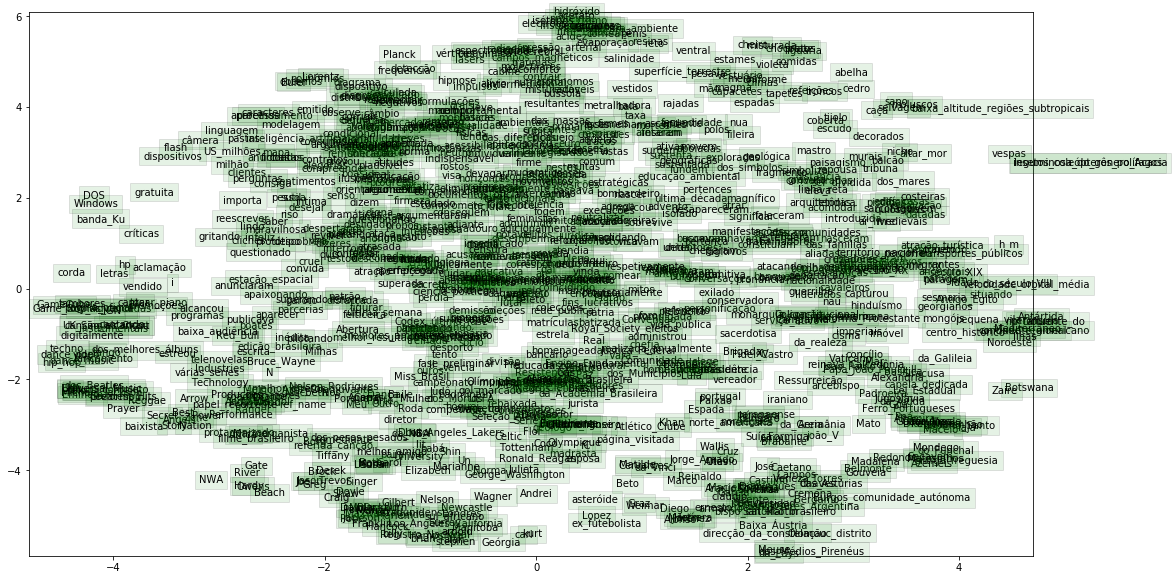

In [39]:
#PLOTAR PALAVRAS ALEATÓRIAS
import random

sample_words = random.sample(range(len(list(tokens.keys()))), 1000)

sample_words[0]

for i in sample_words:
    plt.text(tsne_results[i][0], tsne_results[i][1], tokens_by_id[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(tsne_results[:,0]), np.max(tsne_results[:,0])))
plt.ylim((np.min(tsne_results[:,1]), np.max(tsne_results[:,1])))

fig = plt.gcf()
fig.set_size_inches(18, 10)

# Analogy Evaluation

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(word_vectors)
distances, indices = nbrs.kneighbors(word_vectors)

In [8]:
indices

array([[    0, 19193, 21377, ..., 12106, 26244, 20607],
       [    1, 17177,  4250, ..., 18010,  6479, 19489],
       [    2, 11721, 26960, ..., 11945, 15625, 27075],
       ..., 
       [29997,   823, 29438, ..., 25760, 20536, 26128],
       [29998,  3121,  6026, ..., 12484,  6401, 26510],
       [29999, 29692, 13272, ..., 19487, 16262, 21177]], dtype=int64)

In [14]:
distances

array([[ 0.        ,  4.27979651,  4.53414759, ...,  4.83181055,
         4.89818637,  4.95234181],
       [ 0.        ,  4.36887134,  4.3800574 , ...,  4.72579677,
         4.75072498,  4.772441  ],
       [ 0.        ,  4.44157342,  4.48477891, ...,  4.75669078,
         4.75775452,  4.78517934],
       ..., 
       [ 0.        ,  4.0447938 ,  4.09346415, ...,  4.33473416,
         4.41191579,  4.49038863],
       [ 0.        ,  4.5982197 ,  4.81584553, ...,  5.07892576,
         5.14020224,  5.21666684],
       [ 0.        ,  5.76712412,  5.80056513, ...,  6.32886431,
         6.33550331,  6.34508818]])

In [10]:
import io
fname = "../datasets/LX-4WAnalogiesBr.txt"

with io.open(fname, mode="r", encoding="utf-8") as f:

#with open(fname) as f:
    analogies = f.readlines()

analogies = [x.strip() for x in analogies] 

In [30]:
len(analogies)

17572

In [11]:
def to_word(word_idx):
    return tokens_by_id[word_idx]

wordify_matrix = np.vectorize(to_word)

def vec(word):
    return word_vectors[tokens[word]]


In [34]:
analogy_vectors = np.empty((0, 300))
truth_vectors = np.empty((0, 300))

analogies_matrix = []
truth_words = []

vocabulary = set(list(tokens.keys()))

excluded_words = set()

for analogy in analogies:
    if analogy[0] != ":":
        words = analogy.split(" ")
        if len(set(words) & vocabulary) == 4:
            result = - vec(words[0]) + vec(words[1]) + vec(words[2])
            truth = vec(words[3])
            truth_words.append(words[3])
            
            analogies_matrix.append(words)
            
            analogy_vectors = np.append(analogy_vectors, result.reshape((1,300)), axis=0)
            truth_vectors = np.append(truth_vectors, truth.reshape((1,300)), axis=0)
        else:
            excluded_words.union(set(words) - vocabulary)

In [13]:
analogy_distances, analogy_indices = nbrs.kneighbors(analogy_vectors)

In [14]:
result_words = wordify_matrix(analogy_indices)

In [15]:
def print_analogy(idx):
    print("Analogy words: " + ", ".join(analogies_matrix[idx]))
    print("List of guesses for the last one: " + ", ".join(result_words[idx][:4]) )

In [16]:
print_analogy(2000)

Analogy words: avô, avó, noivo, noiva
List of guesses for the last one: noivo, noiva, avó, governanta


In [17]:
print_analogy(5000)

Analogy words: porco, porcos, carro, carros
List of guesses for the last one: carro, carros, caminhão, pilotando


In [22]:
contador = 0
for idx in range(len(truth_words)):
    if analogies_matrix[idx][3] == result_words[idx][1]:
        contador +=1

In [23]:
contador

1623

In [24]:
contador/len(truth_words)

0.2934369915024408

O contador 

In [27]:
contador = 0
for idx in range(len(truth_words)):
    candidates = result_words[idx]
    candidates_filter = []
    
    original_words = list(analogies_matrix[idx][:3])
    
    for candidate in candidates:
        if candidate not in original_words:
            candidates_filter.append(candidate)
    if analogies_matrix[idx][3] == candidates_filter[0]:
        contador +=1

In [31]:
contador/len(analogies)

0.1291827908035511

In [26]:
analogies_matrix[idx][:]

['escrever', 'escrevem', 'trabalhou', 'trabalham']

In [18]:
for idx in range(len(truth_words)):
    print_analogy(idx)

Analogy words: Atenas, Grécia, Bagdá, Iraque
List of guesses for the last one: Bagdá, Síria, Iraque, Irão
Analogy words: Atenas, Grécia, Pequim, China
List of guesses for the last one: China, Pequim, Grécia, Coréia
Analogy words: Atenas, Grécia, Berlim, Alemanha
List of guesses for the last one: Berlim, Alemanha, Suiça, Roménia
Analogy words: Atenas, Grécia, Berna, Suíça
List of guesses for the last one: Berna, Suíça, Suiça, Basileia
Analogy words: Atenas, Grécia, Cairo, Egito
List of guesses for the last one: Cairo, Egito, Irão, Egipto
Analogy words: Atenas, Grécia, Havana, Cuba
List of guesses for the last one: Havana, Cuba, Chile, Porto_Rico
Analogy words: Atenas, Grécia, Cabul, Afeganistão
List of guesses for the last one: Cabul, Irão, Afeganistão, Líbano
Analogy words: Atenas, Grécia, Londres, Inglaterra
List of guesses for the last one: Londres, Inglaterra, Reino_Unido, França
Analogy words: Atenas, Grécia, Madrid, Espanha
List of guesses for the last one: Madrid, Espanha, Zarago

List of guesses for the last one: Turquia, Síria, Bagdá, Arábia
Analogy words: Ancara, Turquia, Baku, Azerbaijão
List of guesses for the last one: Turquia, Baku, Azerbaijão, Ucrânia
Analogy words: Ancara, Turquia, Pequim, China
List of guesses for the last one: Pequim, China, Turquia, Tailândia
Analogy words: Ancara, Turquia, Beirute, Líbano
List of guesses for the last one: Turquia, Líbano, Beirute, Síria
Analogy words: Ancara, Turquia, Belgrado, Sérvia
List of guesses for the last one: Turquia, Belgrado, Sérvia, Croácia
Analogy words: Ancara, Turquia, Berlim, Alemanha
List of guesses for the last one: Alemanha, Berlim, Turquia, Suiça
Analogy words: Ancara, Turquia, Berna, Suíça
List of guesses for the last one: Berna, Suíça, Suiça, Turquia
Analogy words: Ancara, Turquia, Bratislava, Eslováquia
List of guesses for the last one: Turquia, Eslováquia, Bratislava, República_Tcheca
Analogy words: Ancara, Turquia, Bruxelas, Bélgica
List of guesses for the last one: Bélgica, Bruxelas, França

Analogy words: Trípoli, Líbia, Varsóvia, Polônia
List of guesses for the last one: Varsóvia, União_Soviética, antiga_União_Soviética, polaca
Analogy words: Trípoli, Líbia, Zagreb, Croácia
List of guesses for the last one: Zagreb, Croácia, Letônia, Letónia
Analogy words: Trípoli, Líbia, Argel, Argélia
List of guesses for the last one: Argélia, Argel, Líbia, Tunísia
Analogy words: Trípoli, Líbia, Ancara, Turquia
List of guesses for the last one: Ancara, Líbia, Tajiquistão, Turquia
Analogy words: Trípoli, Líbia, Atenas, Grécia
List of guesses for the last one: Atenas, Grécia, Ática, Líbia
Analogy words: Trípoli, Líbia, Bagdá, Iraque
List of guesses for the last one: Líbia, Bagdá, Iraque, Síria
Analogy words: Trípoli, Líbia, Baku, Azerbaijão
List of guesses for the last one: Baku, Uzbequistão, Azerbaijão, Ucrânia
Analogy words: Trípoli, Líbia, Pequim, China
List of guesses for the last one: Pequim, China, Seul, Mongólia
Analogy words: Trípoli, Líbia, Beirute, Líbano
List of guesses for the

List of guesses for the last one: Arizona, Texas, Utah, Colorado
Analogy words: Chandler, Arizona, Detroit, Michigan
List of guesses for the last one: Arizona, Detroit, Colorado, Utah
Analogy words: Chandler, Arizona, Memphis, Tennessee
List of guesses for the last one: Arizona, Memphis, Utah, Colorado
Analogy words: Chandler, Arizona, Boston, Massachusetts
List of guesses for the last one: Arizona, Oregon, Colorado, Boston
Analogy words: Chandler, Arizona, Seattle, Washington
List of guesses for the last one: Arizona, Seattle, Califórnia, Colorado
Analogy words: Chandler, Arizona, Denver, Colorado
List of guesses for the last one: Arizona, Colorado, Utah, Denver
Analogy words: Chandler, Arizona, Baltimore, Maryland
List of guesses for the last one: Arizona, Utah, Baltimore, Maryland
Analogy words: Chandler, Arizona, Nashville, Tennessee
List of guesses for the last one: Arizona, Nashville, Utah, Texas
Analogy words: Chandler, Arizona, Milwaukee, Wisconsin
List of guesses for the last 

Analogy words: infeliz, infelizmente, seguro, seguramente
List of guesses for the last one: seguro, infelizmente, rastreamento, seguras
Analogy words: infeliz, infelizmente, sério, seriamente
List of guesses for the last one: sério, infelizmente, mas, porém
Analogy words: infeliz, infelizmente, lento, lentamente
List of guesses for the last one: lento, rápido, infelizmente, lentos
Analogy words: infeliz, infelizmente, rápido, rapidamente
List of guesses for the last one: rápido, infelizmente, lento, necessitando
Analogy words: infeliz, infelizmente, típico, tipicamente
List of guesses for the last one: típico, característico, típicos, exemplo
Analogy words: usual, usualmente, aparente, aparentemente
List of guesses for the last one: aparente, usualmente, geralmente, aparentes
Analogy words: usual, usualmente, completo, completamente
List of guesses for the last one: completo, usualmente, geralmente, ou
Analogy words: usual, usualmente, livre, livremente
List of guesses for the last one

Analogy words: escrever, escrevendo, dizer, dizendo
List of guesses for the last one: dizer, dizendo, escrevendo, penso
Analogy words: escrever, escrevendo, gritar, gritando
List of guesses for the last one: gritar, gritando, gritou, grita
Analogy words: escrever, escrevendo, ver, vendo
List of guesses for the last one: ver, escrevendo, aqui, dizendo
Analogy words: escrever, escrevendo, cantar, cantando
List of guesses for the last one: cantar, cantando, escrevendo, Clarkson
Analogy words: escrever, escrevendo, pensar, pensando
List of guesses for the last one: pensar, escrevendo, resumiu, dizendo
Analogy words: escrever, escrevendo, desaparecer, desaparecendo
List of guesses for the last one: desaparecer, obscuridade, notando, longe
Analogy words: escrever, escrevendo, andar, andando
List of guesses for the last one: andar, chão, terraço, pulando
Analogy words: Argentina, Argentino, Brasil, Brasileiro
List of guesses for the last one: Brasil, O, Argentino, Papel
Analogy words: Argenti

List of guesses for the last one: correndo, correr, correu, corria
Analogy words: gritando, gritou, vendo, viu
List of guesses for the last one: vendo, gritou, viu, percebendo
Analogy words: gritando, gritou, vendendo, vendeu
List of guesses for the last one: vendendo, unidades_vendidas, vender, vendeu
Analogy words: gritando, gritou, cantando, cantou
List of guesses for the last one: cantando, cantar, gritou, cantava
Analogy words: gritando, gritou, tirando, tirou
List of guesses for the last one: tirando, perdia, acabava, gritou
Analogy words: gritando, gritou, pensando, pensou
List of guesses for the last one: pensando, disse, gostaria, imaginou
Analogy words: gritando, gritou, desaparecendo, desapareceu
List of guesses for the last one: desaparecendo, passara, paulatinamente, ressurgiu
Analogy words: gritando, gritou, andando, andou
List of guesses for the last one: andando, caminhando, gritou, andou
Analogy words: gritando, gritou, escrevendo, escreveu
List of guesses for the last

List of guesses for the last one: cão, cães, cachorro, gatos
Analogy words: olho, olhos, dólar, dólares
List of guesses for the last one: dólar, centavos, cheque, preços
Analogy words: olho, olhos, sonho, sonhos
List of guesses for the last one: sonho, sonhos, sonha, sonhar
Analogy words: olho, olhos, águia, águias
List of guesses for the last one: águia, olhos, vermelhos, coruja
Analogy words: olho, olhos, elefante, elefantes
List of guesses for the last one: elefante, olhos, coruja, corvo
Analogy words: dedo, dedos, cabra, cabras
List of guesses for the last one: cabra, ovelha, dedos, tubérculos
Analogy words: dedo, dedos, mão, mãos
List of guesses for the last one: mão, dedos, dos_dedos, punhos
Analogy words: dedo, dedos, cavalo, cavalos
List of guesses for the last one: cavalo, dedos, cascos, patas
Analogy words: dedo, dedos, leão, leões
List of guesses for the last one: leão, chifres, leões, elefante
Analogy words: dedo, dedos, máquina, máquinas
List of guesses for the last one: m

Analogy words: fala, falam, aumentar, aumentam
List of guesses for the last one: aumentar, diminuir, os, aumentando
Analogy words: fala, falam, ouvir, ouvem
List of guesses for the last one: ouvir, falam, escutar, ouvem
Analogy words: fala, falam, jogar, jogam
List of guesses for the last one: jogar, jogadores, jogavam, jogando
Analogy words: fala, falam, fornece, fornecem
List of guesses for the last one: fornece, fornecem, fornecendo, provê
Analogy words: fala, falam, dizer, dizem
List of guesses for the last one: dizer, falam, quer, pensam
Analogy words: fala, falam, procura, procuram
List of guesses for the last one: procura, procurando, falam, procuram
Analogy words: fala, falam, ver, vêem
List of guesses for the last one: ver, falam, querem, os
Analogy words: fala, falam, cantar, cantam
List of guesses for the last one: cantar, falam, cantavam, tocar
Analogy words: fala, falam, diz, dizem
List of guesses for the last one: falam, diz, dizem, acham
Analogy words: pensar, pensam, de

In [35]:
excluded_words

{'Abuja',
 'Acra',
 'Akron',
 'Albanês',
 'Amarillo',
 'Amã',
 'Anaheim',
 'Anchorage',
 'Antananarivo',
 'Apia',
 'Arlington',
 'Asgabate',
 'Asmara',
 'Astana',
 'Australiano',
 'Austríaco',
 'Bakersfield',
 'Bamako',
 'Bancoque',
 'Banjul',
 'Belmopã',
 'Bielorusso',
 'Bisqueque',
 'Botsuana',
 'Bujumbura',
 'Búlgaro',
 'Camberra',
 'Cambodja',
 'Cambojano',
 'Campala',
 'Cartum',
 'Catmandu',
 'Chileno',
 'Chisinau',
 'Colombia',
 'Colombiano',
 'Conacri',
 'Coreano',
 'Croata',
 'Daca',
 'Dacar',
 'Dinamarquês',
 'Doa',
 'Duchambé',
 'Egípcio',
 'Elsovênia',
 'Erevan',
 'Escópia',
 'Eslovaco',
 'Fremont',
 'Fresno',
 'Frânces',
 'Funafuti',
 'Gaborone',
 'Garland',
 'Georgetown',
 'Glendale',
 'Hanói',
 'Harare',
 'Helsínque',
 'Hialeah',
 'Holandês',
 'Huntsville',
 'Iene',
 'Ilinóis',
 'Indiano',
 'Irlândes',
 'Irvine',
 'Islamabade',
 'Islandês',
 'Israelita',
 'Jacksonville',
 'Laredo',
 'Lexington',
 'Libreville',
 'Lilongwe',
 'Liubliana',
 'Louisville',
 'Lubbock',
 'Lusaca

In [44]:
tokens["Recife"]

24044

In [ ]:
distances, indices = nbrs.kneighbors(np.array(-vec("Recife")+vec("")))
